# **Detect Phishing Websites EDA**

---

In [17]:
from collections import Counter
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split


In [18]:
BASE_DIR = Path(".").resolve()
DATA_DIR = BASE_DIR / "data"
PROCESSED_DIR = DATA_DIR / "processed"

In [19]:
%matplotlib inline
np.random.seed(42)
pd.set_option("display.max_columns", 31)
plt.style.use("seaborn-v0_8-whitegrid")

## **Dataset**

In [20]:
phishing_website_data = pd.read_csv(DATA_DIR / "phishing-websites.csv")
phishing_website_data.head(n=10)

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,1,-1,1,-1,1,-1,-1,-1,0,1,1,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,1,-1,1,0,-1,-1,1,1,0,1,1,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,1,-1,1,0,-1,-1,-1,-1,0,1,1,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,1,-1,-1,0,0,-1,1,1,0,1,1,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,1,1,1,0,0,-1,1,1,0,-1,1,-1,1,-1,-1,0,-1,1,1,1,1
5,-1,0,-1,1,-1,-1,1,1,-1,1,1,-1,1,0,0,-1,-1,-1,0,1,1,1,1,1,1,1,-1,1,-1,-1,1
6,1,0,-1,1,1,-1,-1,-1,1,1,1,1,-1,-1,0,-1,-1,-1,0,1,1,1,1,1,-1,-1,-1,1,0,-1,-1
7,1,0,1,1,1,-1,-1,-1,1,1,1,-1,-1,0,-1,-1,1,1,0,1,1,1,1,-1,-1,0,-1,1,0,1,-1
8,1,0,-1,1,1,-1,1,1,-1,1,1,-1,1,0,1,-1,1,1,0,1,1,1,1,1,-1,1,1,1,0,1,1
9,1,1,-1,1,1,-1,-1,1,-1,1,1,1,1,0,1,-1,1,1,0,1,1,1,1,1,-1,0,-1,1,0,1,-1


In [21]:
print(f"Number of rows: {phishing_website_data.shape[0]}")
print(f"Number of columns: {phishing_website_data.shape[1]}")
print(f"Dataset shape: {phishing_website_data.shape}")
print(f"Number of missing values: {phishing_website_data.isnull().sum().sum()}")

Number of rows: 11055
Number of columns: 31
Dataset shape: (11055, 31)
Number of missing values: 0


In [22]:
print(f"Number of unique values in each column:\n{phishing_website_data.nunique()}")

Number of unique values in each column:
having_IP_Address              2
URL_Length                     3
Shortining_Service             2
having_At_Symbol               2
double_slash_redirecting       2
Prefix_Suffix                  2
having_Sub_Domain              3
SSLfinal_State                 3
Domain_registeration_length    2
Favicon                        2
port                           2
HTTPS_token                    2
Request_URL                    2
URL_of_Anchor                  3
Links_in_tags                  3
SFH                            3
Submitting_to_email            2
Abnormal_URL                   2
Redirect                       2
on_mouseover                   2
RightClick                     2
popUpWidnow                    2
Iframe                         2
age_of_domain                  2
DNSRecord                      2
web_traffic                    3
Page_Rank                      2
Google_Index                   2
Links_pointing_to_page         3
Sta

In [23]:
print(f"The number of unique values in the class column (Result): {phishing_website_data['Result'].nunique()}")

The number of unique values in the class column (Result): 2


In [24]:

pd.DataFrame(
    Counter(phishing_website_data['Result']).items(),
    columns=["Class", "No_of_Observations"],
)

,Class,No_of_Observations
0,-1,4898
1,1,6157


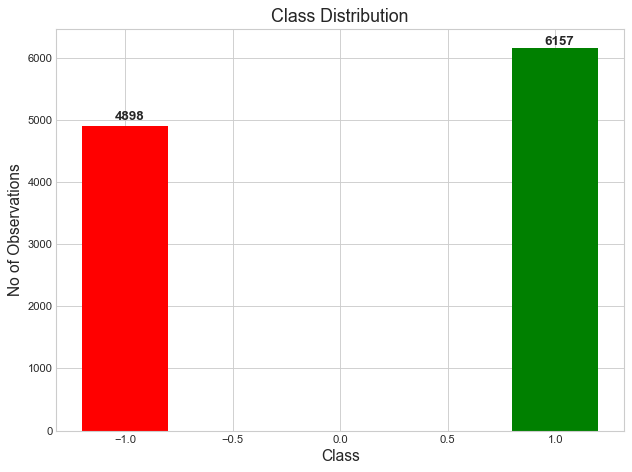

In [25]:
plt.figure(figsize=(8, 6), dpi=80)
plt.bar(
    x=Counter(phishing_website_data['Result']).keys(),
    height=Counter(phishing_website_data['Result']).values(),
    color=["red", "green"],
    width=0.4,
)
plt.xlabel("Class", fontsize=14)
plt.ylabel("No of Observations", fontsize=14)
plt.title("Class Distribution", fontsize=16)
plt.annotate(
    Counter(phishing_website_data['Result'])[1],
    xy=(.95, 6200),
    fontsize=12,
    fontweight="bold",
)
plt.annotate(
    Counter(phishing_website_data['Result'])[-1],
    xy=(-1.05, 5000),
    fontsize=12,
    fontweight="bold",
)
plt.tight_layout();

In [26]:
# Dataset summary statistics
phishing_website_data.describe().round(2)

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,11055.00,11055.00,11055.00,11055.00,11055.00,11055.00,11055.00,11055.00,11055.00,11055.00,11055.00,11055.00,11055.00,11055.00,11055.00,11055.00,11055.00,11055.00,11055.00,11055.00,11055.00,11055.00,11055.00,11055.00,11055.00,11055.00,11055.00,11055.00,11055.00,11055.00,11055.00
mean,0.31,-0.63,0.74,0.70,0.74,-0.73,0.06,0.25,-0.34,0.63,0.73,0.68,0.19,-0.08,-0.12,-0.60,0.64,0.71,0.12,0.76,0.91,0.61,0.82,0.06,0.38,0.29,-0.48,0.72,0.34,0.72,0.11
std,0.95,0.77,0.67,0.71,0.67,0.68,0.82,0.91,0.94,0.78,0.69,0.74,0.98,0.72,0.76,0.76,0.77,0.71,0.32,0.65,0.41,0.79,0.58,1.00,0.93,0.83,0.88,0.69,0.57,0.69,0.99
min,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00
25%,-1.00,-1.00,1.00,1.00,1.00,-1.00,-1.00,-1.00,-1.00,1.00,1.00,1.00,-1.00,-1.00,-1.00,-1.00,1.00,1.00,0.00,1.00,1.00,1.00,1.00,-1.00,-1.00,0.00,-1.00,1.00,0.00,1.00,-1.00
50%,1.00,-1.00,1.00,1.00,1.00,-1.00,0.00,1.00,-1.00,1.00,1.00,1.00,1.00,0.00,0.00,-1.00,1.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,-1.00,1.00,0.00,1.00,1.00
75%,1.00,-1.00,1.00,1.00,1.00,-1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,-1.00,1.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [27]:
phishing_website_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IP_Address            11055 non-null  int64
 1   URL_Length                   11055 non-null  int64
 2   Shortining_Service           11055 non-null  int64
 3   having_At_Symbol             11055 non-null  int64
 4   double_slash_redirecting     11055 non-null  int64
 5   Prefix_Suffix                11055 non-null  int64
 6   having_Sub_Domain            11055 non-null  int64
 7   SSLfinal_State               11055 non-null  int64
 8   Domain_registeration_length  11055 non-null  int64
 9   Favicon                      11055 non-null  int64
 10  port                         11055 non-null  int64
 11  HTTPS_token                  11055 non-null  int64
 12  Request_URL                  11055 non-null  int64
 13  URL_of_Anchor                11055 non-null  i

## **Data Engineering**

In [28]:
# Replace -1 with 0 in the Result column
phishing_website_data["Result"] = phishing_website_data["Result"].replace(-1, 0)

In [29]:
phishing_website_data["Result"].value_counts()

Result
1    6157
0    4898
Name: count, dtype: int64

In [30]:
print(f"Number of missing values in each column:\n{phishing_website_data.isnull().sum()}")

Number of missing values in each column:
having_IP_Address              0
URL_Length                     0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
St

In [31]:
train_data, test_data = train_test_split(
    phishing_website_data,
    test_size=0.2,
    random_state=42,
    stratify=phishing_website_data["Result"],
)

In [32]:
train_data.to_csv(PROCESSED_DIR / "training.csv", index=False)
test_data.to_csv(PROCESSED_DIR / "testing.csv", index=False)